In [140]:
import numpy as np
import urllib
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [141]:
url='http://www.renemagritte.org/images/paintings/the-lovers-2.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content))
ima = np.asanyarray(img)

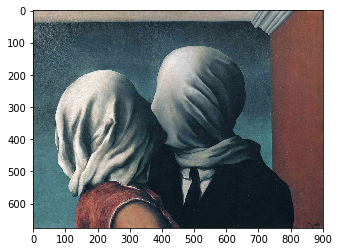

In [142]:
plt.imshow(ima)

In [143]:
g_fil_3 = (1/16.)*np.array([[1,2,1],
                            [2,4,2],
                            [1,2,1]])

emboss =         np.array([[-2,-1, 0],
                           [-1, 1, 1],
                           [ 0, 1, 2]])

edge8 =          np.array([[-1,-1,-1],
                           [-1, 8,-1],
                           [-1,-1,-1]])

bl2whR =          np.array([[-1, 0, 1],
                           [-1, 0, 1],
                           [-1, 0, 1]])

bl2wh5R =           np.array([[-2, -1, 0, 1, 2],
                             [-2, -1, 0, 1, 2],
                             [-2, -1, 0, 1, 2],
                             [-2, -1, 0, 1, 2],
                             [-2, -1, 0, 1, 2]])


wline5  =          np.array([[-2.5, 1, 3, 1, -2.5],
                             [-2.5, 1, 3, 1, -2.5],
                             [-2.5, 1, 3, 1, -2.5],
                             [-2.5, 1, 3, 1, -2.5],
                             [-2.5, 1, 3, 1, -2.5]])

sharp =          np.array([[ 0,-1, 0],
                           [-1, 5,-1],
                           [ 0,-1, 0]])

ssharp =          np.array([[-0.5,-1, -0.5],
                            [-1,   7,   -1],
                            [-0.5,-1, -0.5]])

g_fil_5 = (1/256.)*np.array([[1, 4, 6, 4,1],
                             [4,16,24,16,4],
                             [6,24,36,24,6],
                             [4,16,24,16,4],
                             [1, 4, 6, 4,1]])

blur_box_3 = (1/9.)*np.array([[1,1,1],
                              [1,1,1],
                              [1,1,1]])

my_fil =     np.array([[1,-1, 1],
                       [-1,8,-1],
                       [1,-1, 1]])

blur_box_5 = (1/25.)*np.array([[1, 1, 1, 1, 1],
                               [1, 1, 1, 1, 1],
                               [1, 1, 1, 1, 1],
                               [1, 1, 1, 1, 1],
                               [1, 1, 1, 1, 1]])

In [144]:
def convolution(image, filtr):
    image = image.astype('float')
    image_shape = image.shape
    filtr_shape = filtr.shape
    gap = int(filtr_shape[0]/2)
    output_image = np.array(image.copy())
    output_image = output_image[0:(image_shape[0]-(gap+1)),0:(image_shape[1]-(gap+1))]
    for i in range(gap,(image_shape[0]-gap-1)):
        for j in range(gap, (image_shape[1]-gap-1)):
            for k in range(3):
                pixel = ((image[(i-gap):(i+gap+1),(j-gap):(j+gap+1),k])*filtr).sum().sum()
                if pixel > 255:
                    pixel = 255
                if pixel < 0:
                    pixel = 0
                output_image[i][j][k] = pixel
    return output_image.astype('uint8')

In [145]:
out1 = convolution(ima, blur_box_5)
out2= convolution(out1, ssharp)

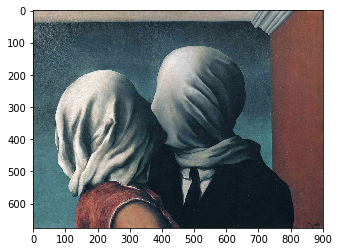

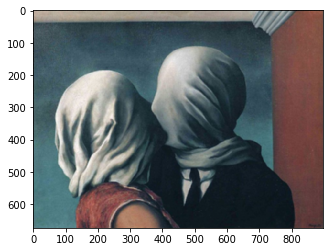

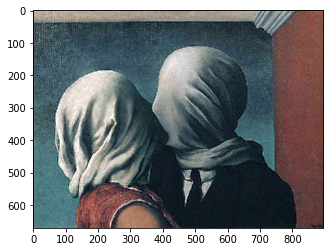

In [146]:
plt.imshow(ima)  #original
plt.show()
plt.imshow(out1) #blur
plt.show()
plt.imshow(out2) #sharp after blur
plt.show()